In [47]:
# Add Jupyter notebook extensions to reload kernel automatically
# This allows code to be reloaded without restarting the kernel when .py files are edited
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The uuv_mission package is imported and a submarine and a mission are set up.

In [48]:
# Update sys.path to include parent directory containing uuv_mission package
import sys  
sys.path.append('..')

# Import relevant classes and functions
from uuv_mission.dynamic import *
from uuv_mission.control import *

# Set the submarine and mission
sub = Submarine()
mission = Mission.from_csv("../data/mission.csv")

# Simulating closed-loop control
Four closed-loop controllers were implemented:
* a PD controller with the (given) parameters $k_d = 0.6$ and $k_p = 0.15$,
* an anti-windup (|maximum integral| = 10.0) PID controller with the same $k_d$ and $k_p$ parameters and $k_i = 0.01$,
* an MPC controller which assumes accurate knowledge of the plant dynamics,
* an 'unsupervised' MPC controller which learns the plant dynamics with time.

## PD Controller with $k_d = 0.6$ and $k_p = 0.15$ (originally suggested controller)

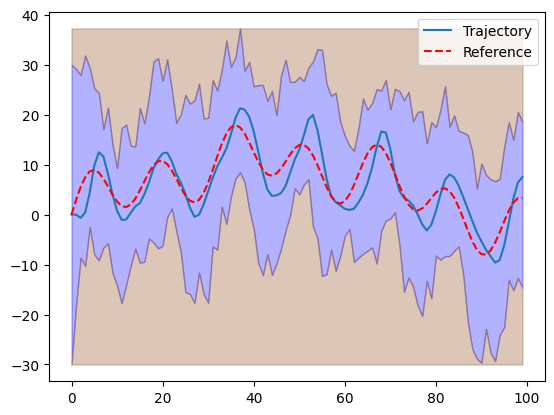

In [24]:
controller = PDController()
closed_loop = ClosedLoop(sub, controller)

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

## Anti-Windup PID Controller with $k_d = 0.6$, $k_p = 0.15$, $k_i = 0.01$ (PID version of the originally suggested controller)

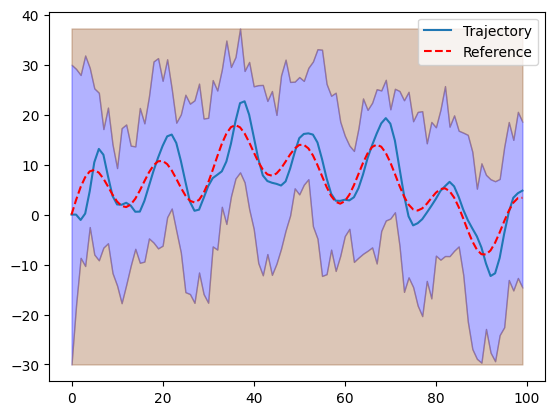

In [23]:
controller = PIDController()
closed_loop = ClosedLoop(sub, controller)

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

## MPC Controller (assumes accurate knowledge of the plant dynamics)

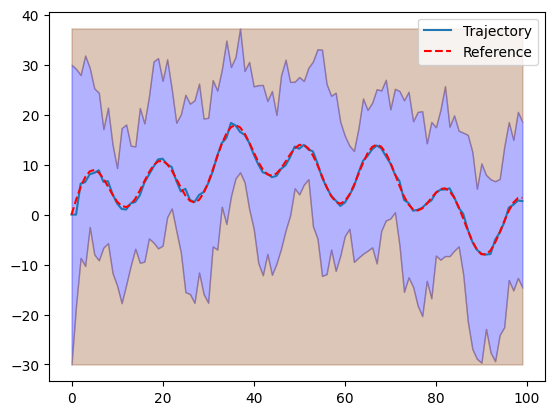

In [28]:
controller = MPCController()
closed_loop = ClosedLoop(sub, controller)

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

## 'Unsupervised' MPC Controller (learns the plant dynamics with time)

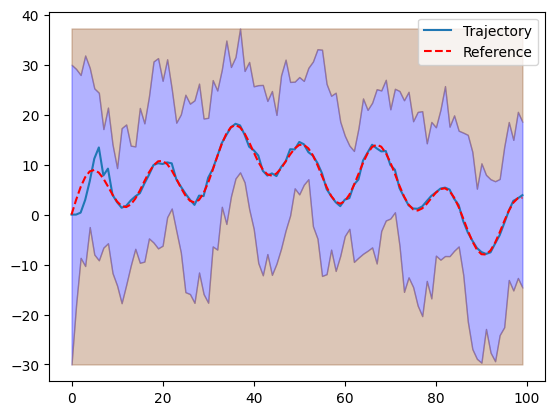

In [34]:
controller = UMPCController()
closed_loop = ClosedLoop(sub, controller)

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

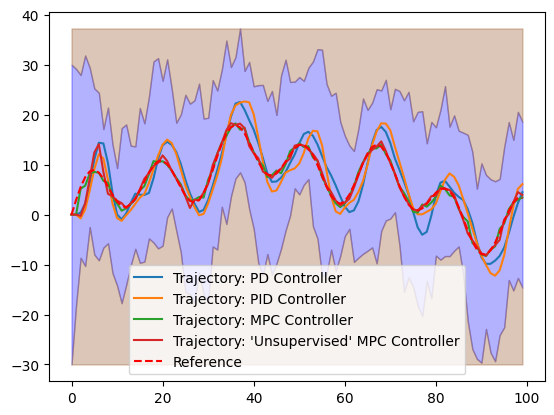

In [53]:
trajectories = []
names = ['PD Controller', 'PID Controller', 'MPC Controller', "'Unsupervised' MPC Controller"]
for controller in [PDController(), PIDController(), MPCController(), UMPCController()]:
    trajectories.append(ClosedLoop(sub, controller).simulate_with_random_disturbances(mission))
plot_multiple_trajectories(trajectories, names, mission)